0. Import the data and declare your package dependencies.

In [66]:
import numpy as np
import pandas as pd


avocadoes = pd.read_csv("Data/avocado-updated-2020.csv")

1. Briefly describe the data set. What information does it contain?

In [67]:
avocadoes


,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


2. Clean the data in any way you see fit.

In [68]:
avocado_clean = avocadoes[['date', 'average_price', 'total_volume', '4046', '4225', '4770', 'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year','geography']]
avocado_clean["geography"].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [73]:
avocado_clean = avocado_clean.rename(columns={'4046': 'Small', '4225': 'Large', '4770':'Xlarge'})

avocado_clean.head()

,date,average_price,total_volume,Small,Large,Xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region_type
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,Metro Region
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,Metro Region
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,Metro Region
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,Metro Region
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,Metro Region


In [69]:
# Define the full mapping of geography to region type
region_mapping = {
    'West': 'Major Region',
    'Northeast': 'Major Region',
    'Southeast': 'Major Region',
    'South Central': 'Major Region',
    'Midsouth': 'Major Region',
    'Great Lakes': 'Major Region',
    'Plains': 'Major Region',
    
    'California': 'State-Level Region',
    'South Carolina': 'State-Level Region',
    'West Tex/New Mexico': 'State-Level Region',
    'Northern New England': 'State-Level Region',
    
    'Albany': 'Metro Region',
    'Atlanta': 'Metro Region',
    'Baltimore/Washington': 'Metro Region',
    'Boise': 'Metro Region',
    'Boston': 'Metro Region',
    'Buffalo/Rochester': 'Metro Region',
    'Charlotte': 'Metro Region',
    'Chicago': 'Metro Region',
    'Cincinnati/Dayton': 'Metro Region',
    'Columbus': 'Metro Region',
    'Dallas/Ft. Worth': 'Metro Region',
    'Denver': 'Metro Region',
    'Detroit': 'Metro Region',
    'Grand Rapids': 'Metro Region',
    'Harrisburg/Scranton': 'Metro Region',
    'Hartford/Springfield': 'Metro Region',
    'Houston': 'Metro Region',
    'Indianapolis': 'Metro Region',
    'Jacksonville': 'Metro Region',
    'Las Vegas': 'Metro Region',
    'Los Angeles': 'Metro Region',
    'Louisville': 'Metro Region',
    'Miami/Ft. Lauderdale': 'Metro Region',
    'Nashville': 'Metro Region',
    'New Orleans/Mobile': 'Metro Region',
    'New York': 'Metro Region',
    'Orlando': 'Metro Region',
    'Philadelphia': 'Metro Region',
    'Phoenix/Tucson': 'Metro Region',
    'Pittsburgh': 'Metro Region',
    'Portland': 'Metro Region',
    'Raleigh/Greensboro': 'Metro Region',
    'Richmond/Norfolk': 'Metro Region',
    'Roanoke': 'Metro Region',
    'Sacramento': 'Metro Region',
    'San Diego': 'Metro Region',
    'San Francisco': 'Metro Region',
    'Seattle': 'Metro Region',
    'Spokane': 'Metro Region',
    'St. Louis': 'Metro Region',
    'Syracuse': 'Metro Region',
    'Tampa': 'Metro Region',
    
    'Total U.S.': 'Total U.S.'  
}

# Create a new region type column based on the mapping
avocado_clean['region_type'] = avocado_clean['geography'].apply(lambda x: region_mapping.get(x, 'Unknown'))

avocado_clean.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region_type
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,Metro Region
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,Metro Region
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,Metro Region
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,Metro Region
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,Metro Region


3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [74]:
major_regions_2017_organic = avocado_clean[(avocado_clean['region_type'] == 'Major Region') & (avocado_clean['year'] == 2017) & (avocado_clean['type'] == 'organic')]

# Step 4: Group by the new 'major_region' and sum small avocados
total_small_hass_by_major_region = major_regions_2017_organic.groupby('geography')['Small'].sum()


In [75]:

# Step 5: Find the major region with the most sales
max_major_region = total_small_hass_by_major_region.idxmax()
max_sales = total_small_hass_by_major_region.max()

print(f"The major region that sold the most total organic small Hass avocados in 2017 is {max_major_region}, with {max_sales} avocados sold.")

The major region that sold the most total organic small Hass avocados in 2017 is West, with 1870206.29 avocados sold.
The major region that sold the most total organic small Hass avocados in 2017 is West, with 1870206.29 avocados sold.


Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [76]:
avocado_clean['date'] = pd.to_datetime(avocado_clean['date'])

# Create separate 'Year', 'Month', and 'Day' columns
avocado_clean['year'] = avocado_clean['date'].dt.year
avocado_clean['month'] = avocado_clean['date'].dt.month
avocado_clean['day'] = avocado_clean['date'].dt.day

In [77]:
monthly_avg_volume = avocado_clean.groupby('month')['total_volume'].mean()

# Find the month with the maximum average sales volume
max_volume_month = monthly_avg_volume.idxmax()
max_avg_volume = monthly_avg_volume.max()

print(max_volume_month)
print(max_avg_volume)

5
1123632.254218107
5
1123632.254218107


May is the month with the highest average volume of avocado sales with an average volume of 1,123,632 avocadoes.


5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [48]:
df_metro = avocado_clean[avocado_clean['region_type'] == 'Metro Region']

# Group by metro area and calculate the average total volume
metro_avg_volume = df_metro.groupby('geography')['total_volume'].mean().reset_index()

# Sort to get the top 5 metro areas with the highest average volume
top_metro_areas = metro_avg_volume.sort_values(by='total_volume', ascending=False).head(5)
top_metro_names = top_metro_areas['geography'].tolist()

# Filter the original metro DataFrame to include only the top 5 metro areas
df_top_metro = df_metro[df_metro['geography'].isin(top_metro_names)]




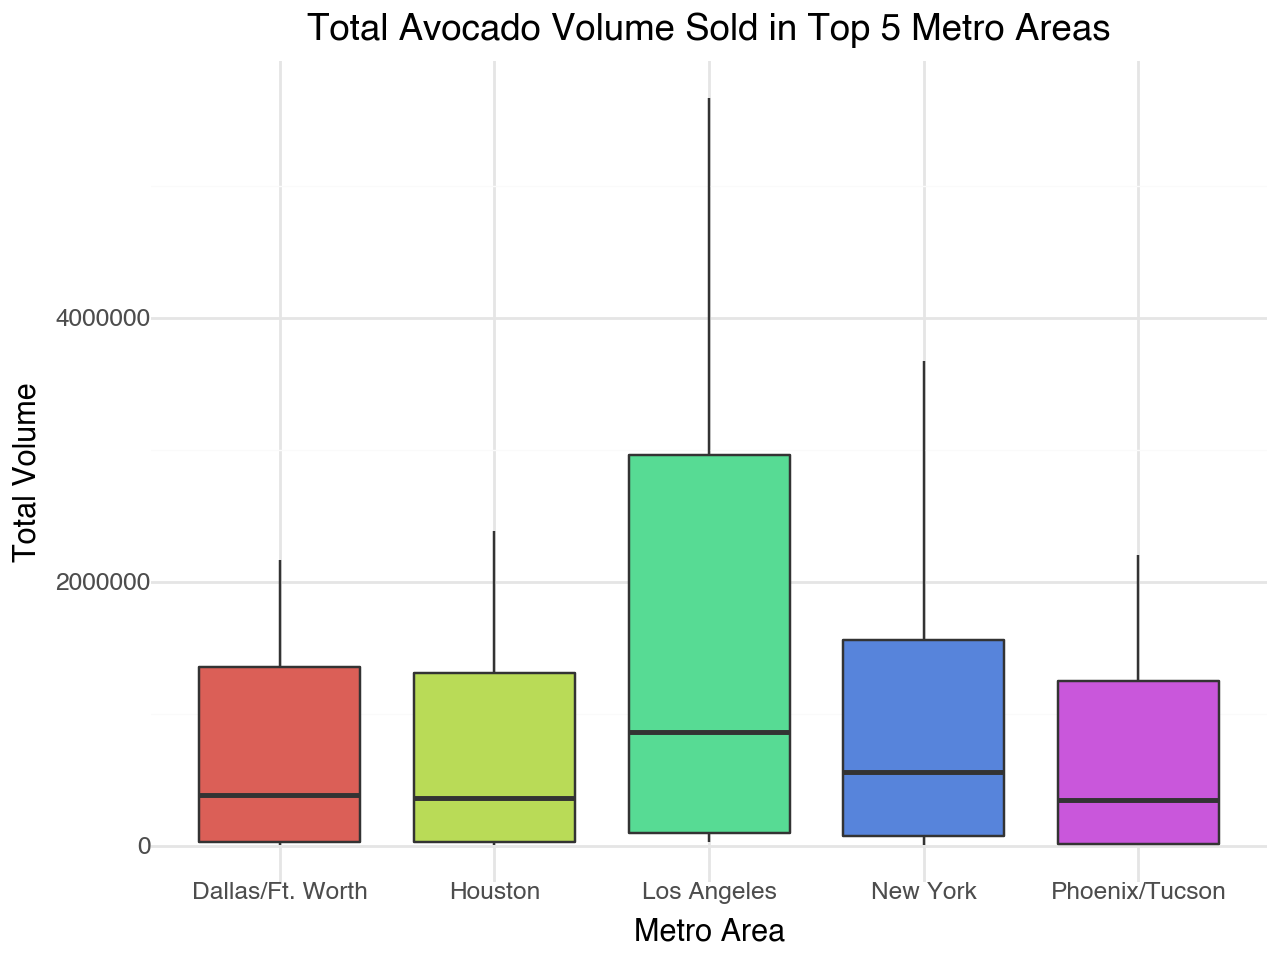

In [78]:
from plotnine import ggplot, aes, geom_boxplot, labs, theme_minimal, guides

(
    ggplot(df_top_metro, aes(x='geography', y='total_volume', fill='geography')) +
    geom_boxplot() +
    theme_minimal() +
    guides(fill=False) +
    labs(
        title='Total Avocado Volume Sold in Top 5 Metro Areas',
        x='Metro Area',
        y='Total Volume'
    )
)

6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [63]:
california_regions = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]
california = avocado_clean[avocado_clean['geography'].isin(california_regions)]

california["geography"].unique()



array(['Los Angeles', 'Sacramento', 'San Diego', 'San Francisco'],
      dtype=object)

7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [85]:
price_summary = (california.groupby(['geography', 'type'])['average_price'].mean().unstack())

# Add a new column for price difference between Organic and Conventional
price_summary['price_difference'] = abs(price_summary['organic'] - price_summary['conventional'])

price_summary

type,conventional,organic,price_difference
geography,,,
Los Angeles,1.047124,1.574902,0.527778
Sacramento,1.295359,1.873856,0.578497
San Diego,1.113856,1.798366,0.684510
San Francisco,1.400490,2.119444,0.718954


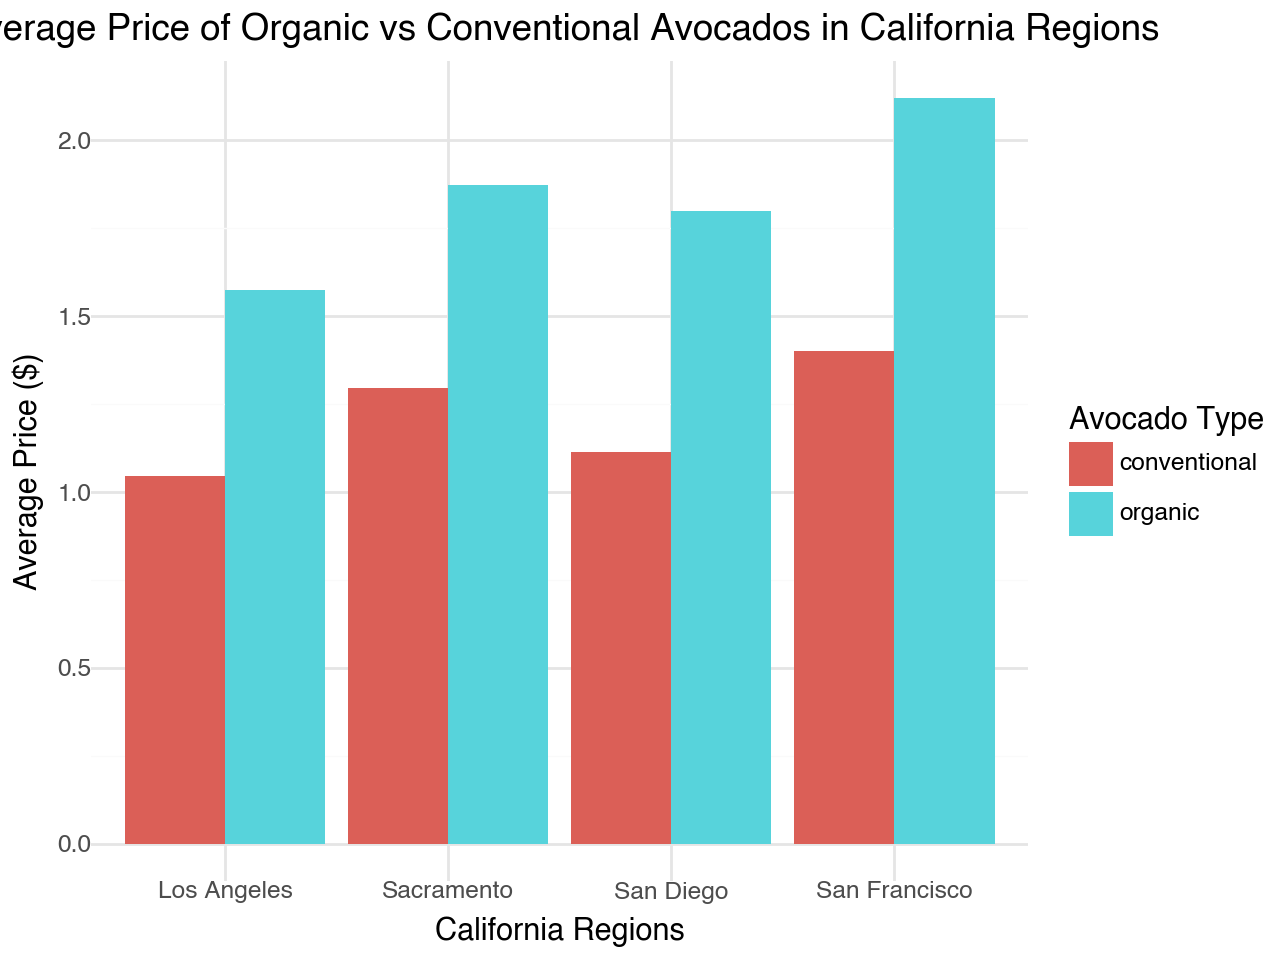

In [87]:
price_summary = price_summary.reset_index()


price_summary_long = pd.melt(price_summary, id_vars='geography', value_vars=['organic', 'conventional'], var_name='Type', value_name='average_price')

# Create a bar plot using plotnine
(
    ggplot(price_summary_long, aes(x='geography', y='average_price', fill='Type')) +
    geom_bar(stat='identity', position='dodge') + 
    theme_minimal() +
    labs(
        title='Average Price of Organic vs Conventional Avocados in California Regions',
        x='California Regions',
        y='Average Price ($)',
        fill='Avocado Type'
    )
)

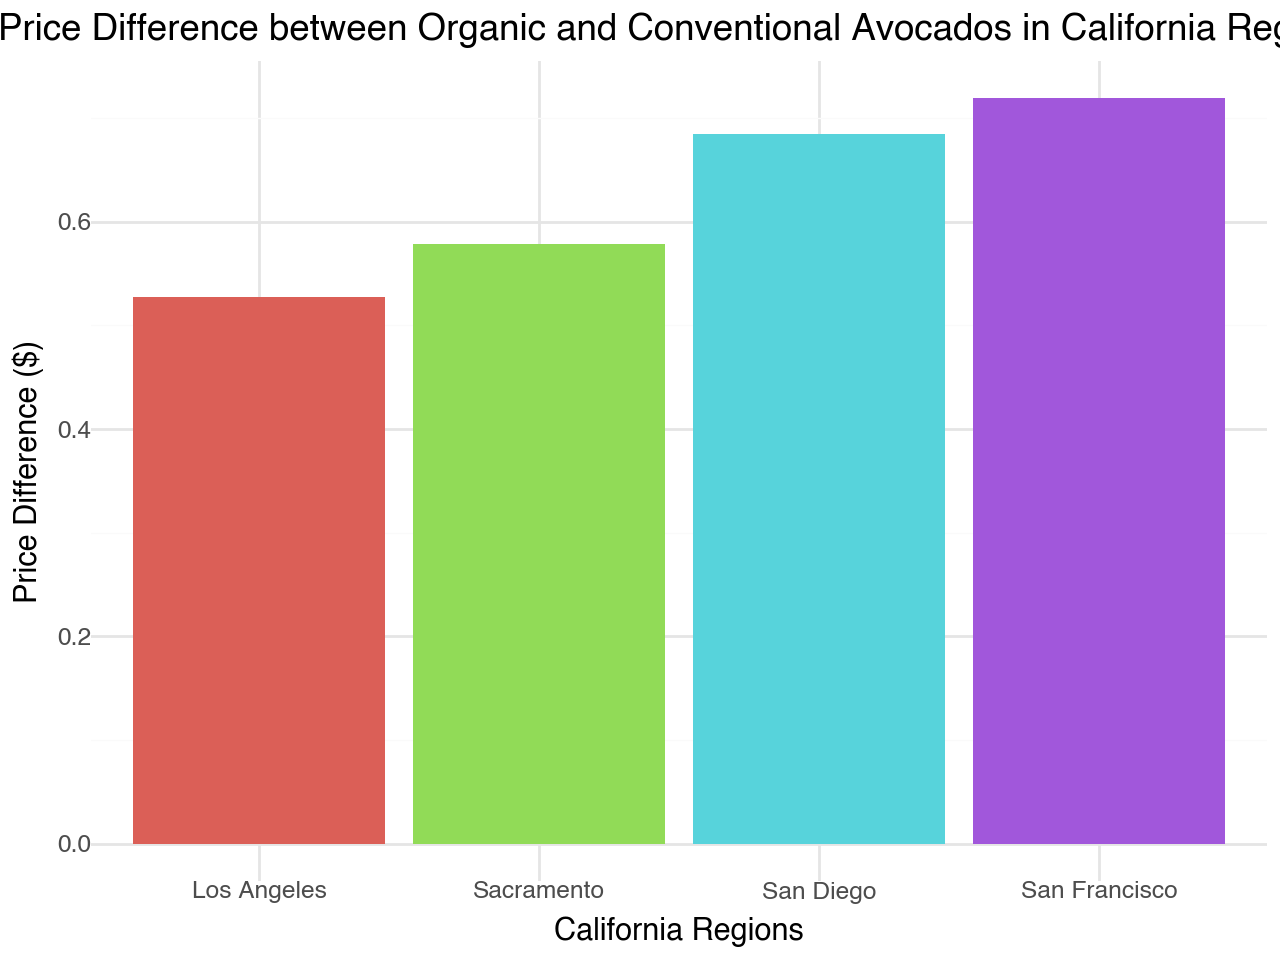

In [89]:

(ggplot(price_summary, aes(x='geography', y='price_difference', fill='geography')) +
    geom_bar(stat='identity') +
    theme_minimal() +
    guides(fill=False) +
    labs(
        title='Price Difference between Organic and Conventional Avocados in California Regions',
        x='California Regions',
        y='Price Difference ($)')
)

In [65]:
california.head()

,date,average_price,total_volume,small_hass,large_hass,extra_large_hass,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region_type,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,Metro Region,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,Metro Region,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,Metro Region,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,Metro Region,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,Metro Region,1,4


8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.
![](Images/figure-1.png)

In [64]:
from plotnine import (
    ggplot, aes, geom_bar, facet_wrap, labs, theme_minimal, theme, scale_fill_manual
)

# Assuming `california_df` is already defined as a DataFrame that contains California regions only
# Replace california_df with your own DataFrame

# Step 1: Calculate the proportion of sales by size for each region and avocado type
size_proportion_df = (
    california_df
    .groupby(['geography', 'type', 'size'])['total_volume']
    .sum()
    .groupby(level=[0, 1])  # Group by Geography and type to get the total
    .apply(lambda x: x / x.sum())  # Calculate the proportion
    .reset_index()
    .rename(columns={'total_volume': 'Proportion'})  # Rename for clarity
)

# Step 2: Create the plot using plotnine
(ggplot(size_proportion_df, aes(x='geography', y='Proportion', fill='size')) +
    geom_bar(stat='identity', position='stack') +
    facet_wrap('~type') +  # Separate panels for conventional and organic
    labs(
        title='Proportion of Average Hass Avocado Sales by Size',
        x='Region of California',
        y='Proportion',
        fill='size'
    ) +
    scale_fill_manual(values={'Xlarge': '#6A5ACD', 'Large': '#3CB371', 'Small': '#CD853F'}) +  # Custom colors
    theme_minimal() +
    theme(figure_size=(10, 6))
)


NameError: name 'california_df' is not defined